# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

This data represents 45,211 marketing campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import time
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [5]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The objective of this project is to use the dataset that is made by a Portugese banking institution to determine whether a client will subscribe (yes/no) on a term deposit. We want to use four different classifiers (KNearest Neighbors, Logistic Regression, Decision Trees, and Support Vector Machines) to predict a yes or no.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [10]:
# drop all unknowns and make columns 1-7 the dependent variables
# quality check age by checking if there is anything other than integers
df['age'].dtypes
# age looks good no real changes need to be made

dtype('int64')

In [13]:
#quality check job by removing unknowns
df['job'].value_counts()
df = df[df['job'] != 'unknown']
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [16]:
#quality check marital status by removing unknowns 
df['marital'].value_counts()
df = df[df['marital'] != 'unknown']
df['marital'].value_counts()

married     24694
single      11494
divorced     4599
Name: marital, dtype: int64

In [18]:
#quality check education by removing unknowns
df['education'].value_counts()
df = df[df['education'] != 'unknown']
df['education'].value_counts()

university.degree      12096
high.school             9464
basic.9y                6006
professional.course     5225
basic.4y                4118
basic.6y                2264
illiterate                18
Name: education, dtype: int64

In [21]:
#quality check default remove unknowns and turn yes to 1 and no to 0
df['default'].value_counts()
df = df[df['default'] != 'unknown']
df['default'].value_counts()
df['default'] = df['default'].replace({'yes': 1, 'no': 0})
df['default'].value_counts()

0    31224
1        3
Name: default, dtype: int64

In [23]:
#quality check housing remove unknowns and turn yes to 1 and no to 0
df['housing'].value_counts()
df = df[df['housing'] != 'unknown']
df['housing'] = df['housing'].replace({'yes': 1, 'no': 0})
df['housing'].value_counts()

1    16521
0    13967
Name: housing, dtype: int64

In [24]:
#quality check loan remove unknowns and turn yes to 1 and no to 0
df['loan'].value_counts()
df = df[df['loan'] != 'unknown']
df['loan'] = df['loan'].replace({'yes': 1, 'no': 0})
df['loan'].value_counts()

0    25720
1     4768
Name: loan, dtype: int64

In [26]:
# create X and y


X = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
y = df['y']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(22866, 7)
(7622, 7)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

After doing lots of research on what a good score should be, I believe that our classifiers should do their best to be above 0.8

We should aim to be higher than 0.8

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [62]:
#make column transformer for job, marital, and education
# job_transformer = make_column_transformer((OneHotEncoder(drop='first'),['job']), remainder = StandardScaler())
# mar_transformer = make_column_transformer((OneHotEncoder(drop='first'),['marital']), remainder = StandardScaler())
# edu_transformer = make_column_transformer((OneHotEncoder(drop='first'),['education']), remainder = StandardScaler())

transformer = make_column_transformer((OneHotEncoder(drop='first'), ['job', 'marital', 'education']), remainder = StandardScaler())
#make LR model

LR_Pipeline = Pipeline([('transform', transformer),('lr', LogisticRegression())])
t0 = time.time()
LR_Pipeline.fit(X_train, y_train)
LR_time = time.time() - t0
print(LR_time)

0.15474390983581543


### Problem 9: Score the Model

What is the accuracy of your model?

In [35]:
LR_acc = LR_Pipeline.score(X_test, y_test)
print(f'Test Accuracy for Logistic Regression is {LR_acc}')
LR_train_acc = LR_Pipeline.score(X_train, y_train)
print(f'Train Accuracy for Logistic Regression is {LR_train_acc}')

Test Accuracy for Linear Regression is 0.8728680136447127
Train Accuracy for LinearRegression is 0.8736114755532232


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

Work for KNearestNeighbors:

In [36]:
KNN_Pipeline = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier())])
t0 = time.time()
KNN_Pipeline.fit(X_train, y_train)
KNN_time = time.time() - t0
print(KNN_time)
KNN_acc = KNN_Pipeline.score(X_test, y_test)
print(f'Test Accuracy for KNearest Neighbors is {KNN_acc}')
KNN_train_acc = KNN_Pipeline.score(X_train, y_train)
print(f'Train Accuracy for KNearest Neighbors is {KNN_train_acc}')

0.05711483955383301
Test Accuracy for KNearest Neighbors is 0.8638152715822619
Train Accuracy for KNearest Neighbors is 0.8760167934925216


Work for Decision Trees:

In [49]:


DT_Pipeline = Pipeline([('transform', transformer), ('dtree', DecisionTreeClassifier(max_depth = 1))])
t0 = time.time()
DT_Pipeline.fit(X_train, y_train)
DT_time = time.time() - t0
print(DT_time)
DT_acc = DT_Pipeline.score(X_test, y_test)
print(f'Test Accuracy for Decision Trees is {DT_acc}')
DT_train_acc = DT_Pipeline.score(X_train, y_train)
print(f'Train Accuracy for Decision Trees is {DT_train_acc}')

0.062161922454833984
Test Accuracy for Decision Trees is 0.8728680136447127
Train Accuracy for Decision Trees is 0.8736114755532232


Work for SVM:

In [54]:
from sklearn.svm import SVC

SVM_Pipeline = Pipeline([('transform', transformer), ('SVC', SVC())])
t0 = time.time()
SVM_Pipeline.fit(X_train, y_train)
SVM_time = time.time() - t0
print(SVM_time)
SVM_acc = SVM_Pipeline.score(X_test, y_test)
print(f'Test Accuracy for SVM is {SVM_acc}')
SVM_train_acc = SVM_Pipeline.score(X_train, y_train)
print(f'Train Accuracy for SVM is {SVM_train_acc}')

11.61132001876831
Test Accuracy for SVM is 0.8728680136447127
Train Accuracy for SVM is 0.8736114755532232


In [67]:
data = [['LogisticRegression',LR_time, LR_train_acc, LR_acc],
        ['KNN', KNN_time, KNN_train_acc, KNN_acc],
        ['DecisionTrees', DT_time, DT_train_acc, DT_acc],
        ['SVM', SVM_time, SVM_train_acc, SVM_acc]]

model_comp_df = pd.DataFrame(data, columns=['Model','Train Time', 'Train Accuracy', 'Test Accuracy'])

In [68]:
model_comp_df.head()

,Model,Train Time,Train Accuracy,Test Accuracy
0,LogisticRegression,0.154744,0.873611,0.872868
1,KNN,0.057115,0.876017,0.863815
2,DecisionTrees,0.062162,0.873611,0.872868
3,SVM,11.611320,0.873611,0.872868


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

My improvements for how I did KNN would involve me trying out different odd numbers for k and getting the accuracy for them. Then I would train with the k that gives the highest accuracy.

In [82]:

accuracy = []
g_score = 0
g_n = 0
for k in range(1, 40, 2):
    knn = Pipeline([('transformer', transformer), ('knn', KNeighborsClassifier(n_neighbors = k))])
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    if (score > g_score):
        g_score = score
        g_n = k
    accuracy.append(score)
    
print(accuracy)
print(g_score)
print(g_n)
# plt.plot(range(1,50,2), accuracy)

[0.7870637627919181, 0.8506953555497245, 0.8638152715822619, 0.8697192337969037, 0.8718184203621097, 0.8732616111256888, 0.8727368144843873, 0.8714248228811335, 0.8724744161637366, 0.8726056153240619, 0.872999212805038, 0.8735240094463396, 0.8737864077669902, 0.8733928102860141, 0.8735240094463396, 0.8737864077669902, 0.8735240094463396, 0.8735240094463396, 0.8732616111256888, 0.8731304119653635]
0.8737864077669902
25


Text(0, 0.5, 'Accuracy Rate')

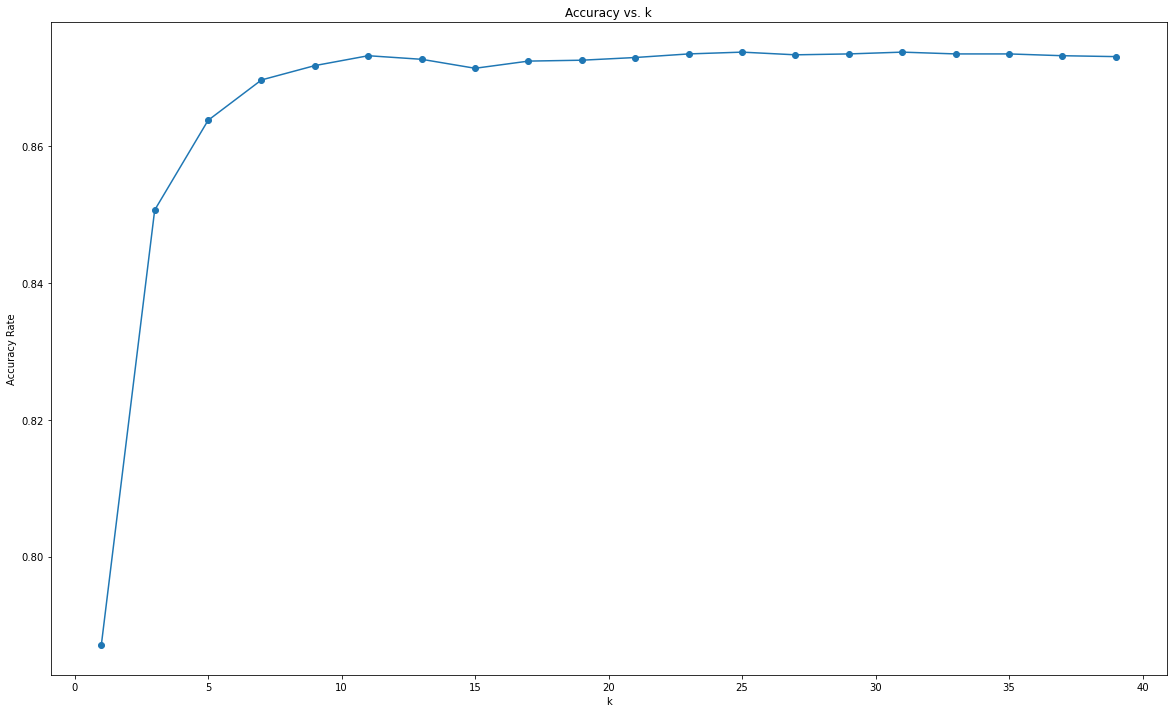

In [80]:
plt.figure(figsize=(20, 12))
plt.plot(range(1,40,2), accuracy, marker = 'o')
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy Rate')

From this we see that the highest accuracy is when k = 25. From there, we will get the metrics like we did earlier but with n_neighbors = 25

In [83]:
KNN_Pipeline = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier(n_neighbors = 25))])
t0 = time.time()
KNN_Pipeline.fit(X_train, y_train)
KNN_time = time.time() - t0
print(KNN_time)
KNN_acc = KNN_Pipeline.score(X_test, y_test)
print(f'Test Accuracy for KNearest Neighbors is {KNN_acc}')
KNN_train_acc = KNN_Pipeline.score(X_train, y_train)
print(f'Train Accuracy for KNearest Neighbors is {KNN_train_acc}')

0.06582403182983398
Test Accuracy for KNearest Neighbors is 0.8737864077669902
Train Accuracy for KNearest Neighbors is 0.873436543339456


In [86]:
KNN_test_acc_diff = KNN_acc - model_comp_df.iloc[1]['Test Accuracy']
print(KNN_test_acc_diff)
KNN_train_acc_diff = KNN_train_acc - model_comp_df.iloc[1]['Train Accuracy']
print(KNN_train_acc_diff)

0.009971136184728335
-0.002580250153065622


While, the test accuracy was a bit higher, the train accuaracy was lower meaning that there is nothing conclusive on whether this improved the accuracy or not.

##### Questions